In [70]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork

In [71]:
data_rings3_train = pd.read_csv("dane_nn4/rings3-regular-training.csv")
X_rings3_train = data_rings3_train[['x', 'y']].values.reshape(-1, 2)
y_rings3_train = data_rings3_train['c'].values.reshape(-1, 1)

data_rings3_test = pd.read_csv("dane_nn4/rings3-regular-test.csv")
X_rings3_test = data_rings3_test[['x', 'y']].values.reshape(-1, 2)
y_rings3_test = data_rings3_test['c'].values.reshape(-1, 1)

data_easy_train = pd.read_csv("dane_nn4/easy-training.csv")
X_easy_train = data_easy_train[['x', 'y']].values.reshape(-1, 2)
y_easy_train = data_easy_train['c'].values.reshape(-1, 1)
y_easy_train = y_easy_train.astype(int)

data_easy_test = pd.read_csv("dane_nn4/easy-test.csv")
X_easy_test = data_easy_test[['x', 'y']].values.reshape(-1, 2)
y_easy_test = data_easy_test['c'].values.reshape(-1, 1)
y_easy_test = y_easy_test.astype(int)

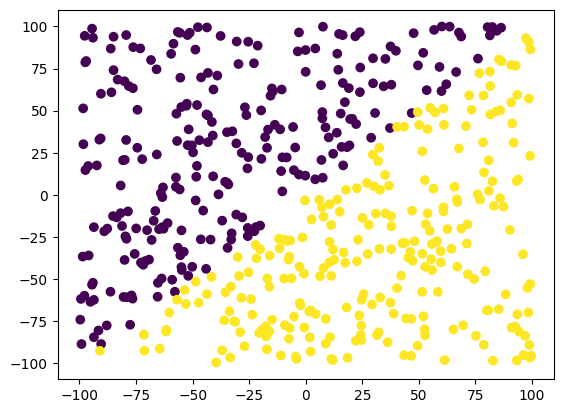

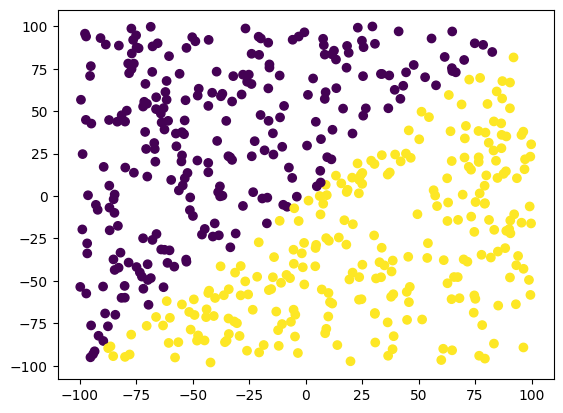

In [24]:
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=y_easy_train.ravel(), cmap='viridis')
plt.show()

plt.scatter(X_easy_test[:, 0], X_easy_test[:, 1], c=y_easy_test.ravel(), cmap='viridis')
plt.show()

In [114]:
input_size = X_easy_train.shape[1]
output_size = np.unique(y_easy_train).shape[0]

nn_easy = NeuralNetwork(X_easy_train, y_easy_train, [input_size, 20, 20, 1], activation_fun='sigmoid', output_activation='sigmoid', loss_fun='crossentropy')

history_easy = nn_easy.train(epochs=10000, learning_rate=0.01, mini_batch=True, batch_size=32,
                             optimization='rmsprop', stop_condition=0, report_interval=10)

Starting MSE: 0.81
Epoch 0, Train loss: 0.11
Epoch 10, Train loss: 0.05
Epoch 20, Train loss: 0.01
Epoch 30, Train loss: 0.00
Epoch 40, Train loss: 0.02
Epoch 50, Train loss: 0.10
Epoch 60, Train loss: 0.03
Epoch 70, Train loss: 0.02
Epoch 80, Train loss: 0.01
Epoch 90, Train loss: 0.00
Epoch 100, Train loss: 0.00
Epoch 110, Train loss: 0.04
Epoch 120, Train loss: 0.02
Epoch 130, Train loss: 0.06
Epoch 140, Train loss: 0.01
Epoch 150, Train loss: 0.00
Epoch 160, Train loss: 0.00
Epoch 170, Train loss: 0.01
Epoch 180, Train loss: 0.03
Epoch 190, Train loss: 0.01
Epoch 200, Train loss: 0.01
Epoch 210, Train loss: 0.00
Epoch 220, Train loss: 0.05
Epoch 230, Train loss: 0.01
Epoch 240, Train loss: 0.01
Epoch 250, Train loss: 0.02
Epoch 260, Train loss: 0.00
Epoch 270, Train loss: 0.01
Epoch 280, Train loss: 0.00
Epoch 290, Train loss: 0.01
Epoch 300, Train loss: 0.00
Epoch 310, Train loss: 0.01
Epoch 320, Train loss: 0.01
Epoch 330, Train loss: 0.02
Epoch 340, Train loss: 0.02
Epoch 350, T

Accuracy: 0.998


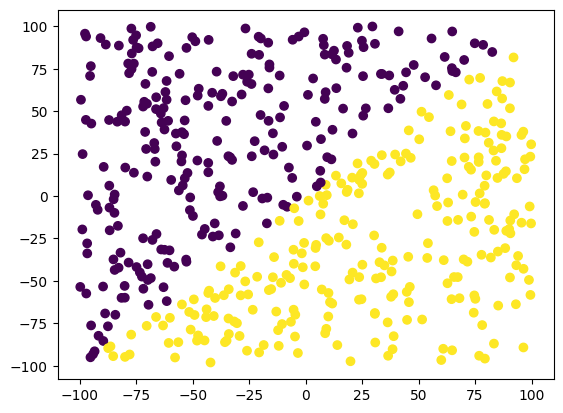

In [116]:
y_easy_pred = nn_easy.predict(X_easy_test)
y_easy_pred = np.round(y_easy_pred)
## accuracy
accuracy = np.mean(y_easy_pred == y_easy_test)
print(f"Accuracy: {accuracy}")

plt.scatter(X_easy_test[:, 0], X_easy_test[:, 1], c=y_easy_pred.ravel(), cmap='viridis')
plt.show()

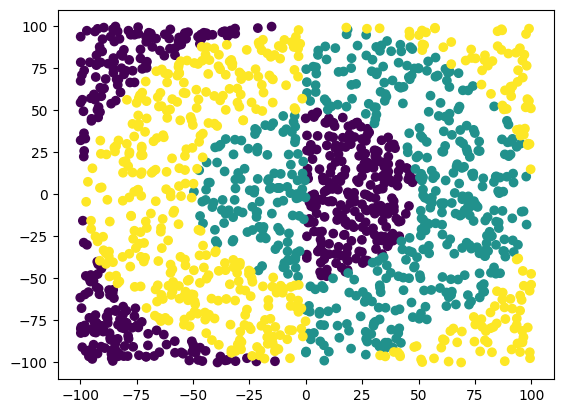

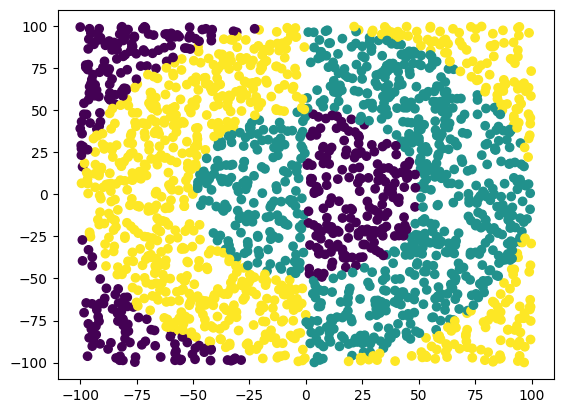

In [4]:
# plot the data

plt.scatter(X_rings3_train[:, 0], X_rings3_train[:, 1], c=y_rings3_train.ravel(), cmap='viridis')
plt.show()

plt.scatter(X_rings3_test[:, 0], X_rings3_test[:, 1], c=y_rings3_test.ravel(), cmap='viridis')
plt.show()


In [110]:
input_size = X_rings3_train.shape[1]
output_size = np.unique(y_rings3_train).shape[0]
nn_rings3 = NeuralNetwork(X_rings3_train, y_rings3_train, 
                   [input_size, 20, 20, output_size],
                   activation_fun='sigmoid', 
                   output_activation='sigmoid',  # or softmax 
                   loss_fun='crossentropy')

history_rings3 = nn_rings3.train(learning_rate=0.001, epochs=int(2e3), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=100,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)
history_rings3 = nn_rings3.train(learning_rate=0.00105, epochs=int(1e3), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=100,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)

Starting MSE: 0.60
Epoch 0, Train loss: 0.63, Val loss: 0.57
Epoch 10, Train loss: 0.79, Val loss: 0.75
Epoch 20, Train loss: 0.97, Val loss: 0.96
Epoch 30, Train loss: 1.02, Val loss: 1.01
Epoch 40, Train loss: 1.02, Val loss: 1.00
Epoch 50, Train loss: 1.01, Val loss: 0.99
Epoch 60, Train loss: 1.01, Val loss: 0.98
Epoch 70, Train loss: 1.00, Val loss: 0.98
Epoch 80, Train loss: 0.99, Val loss: 0.97
Epoch 90, Train loss: 0.99, Val loss: 0.97
Epoch 100, Train loss: 0.99, Val loss: 0.96
Epoch 110, Train loss: 0.98, Val loss: 0.95
Epoch 120, Train loss: 0.97, Val loss: 0.94
Epoch 130, Train loss: 0.97, Val loss: 0.94
Epoch 140, Train loss: 0.97, Val loss: 0.94
Epoch 150, Train loss: 0.95, Val loss: 0.92
Epoch 160, Train loss: 0.95, Val loss: 0.92
Epoch 170, Train loss: 0.94, Val loss: 0.91
Epoch 180, Train loss: 0.93, Val loss: 0.90
Epoch 190, Train loss: 0.91, Val loss: 0.89
Epoch 200, Train loss: 0.89, Val loss: 0.87
Epoch 210, Train loss: 0.88, Val loss: 0.86
Epoch 220, Train loss: 0

Accuracy: 0.9455


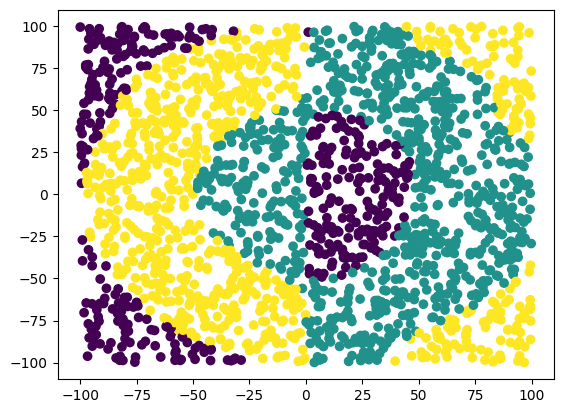

In [111]:
y_pred = nn_rings3.predict(X_rings3_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = np.mean(y_pred == y_rings3_test.ravel())
print(f'Accuracy: {accuracy}')

plt.scatter(X_rings3_test[:, 0], X_rings3_test[:, 1], c=y_pred, cmap='viridis')
plt.show()